<a href="https://colab.research.google.com/github/Sahar-dev/Multivariate_statistics/blob/main/Tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading and analysing the data

In [ ]:
data <- read.csv2("/content/ANOVA2.csv", sep = ";")

 Décrire la variable « Reponse » et étudier sa normalité

In [ ]:
head(data)

,Preparation,Dose,Reponse
,<chr>,<int>,<int>
1,T1,1,300
2,T1,1,310
3,T1,1,330
4,T1,1,290
5,T1,1,364
6,T1,1,328


In [ ]:
str(data)

'data.frame':	60 obs. of  3 variables:
 $ Preparation: chr  "T1" "T1" "T1" "T1" ...
 $ Dose       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Reponse    : int  300 310 330 290 364 328 390 360 342 306 ...


In [ ]:
# "Dose" is int, so we have to change its type
data$Dose=as.factor(data$Dose)

In [ ]:
# "Preparation" is char, so we have to change its type
data$Preparation=as.factor(data$Preparation)

In [ ]:
str(data)

'data.frame':	60 obs. of  3 variables:
 $ Preparation: Factor w/ 3 levels "T1","T2","T3": 1 1 1 1 1 1 1 1 1 1 ...
 $ Dose       : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ Reponse    : int  300 310 330 290 364 328 390 360 342 306 ...


In [ ]:
summary(data)

 Preparation Dose      Reponse     
 T1:20       1:30   Min.   :210.0  
 T2:20       2:30   1st Qu.:240.8  
 T3:20              Median :271.5  
                    Mean   :280.1  
                    3rd Qu.:310.5  
                    Max.   :390.0  

In [ ]:
shapiro.test(data$Reponse)


	Shapiro-Wilk normality test

data:  data$Reponse
W = 0.96532, p-value = 0.08584


H0: the data follows a normal distribution.

p-value is 0.08584>0.05.

=> fail to reject the null hypothesis, suggesting that there's no significant evidence to say that our data doesn't come from a normal distribution.

# Etudier la relation entre la "Reponse" et les préparations à différentes doses

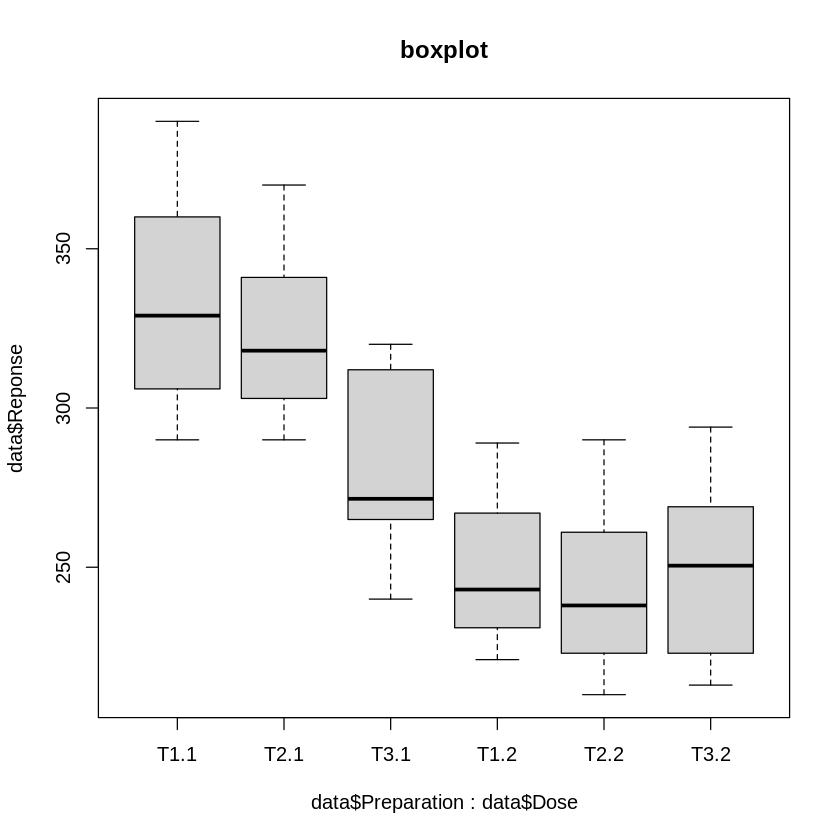

In [ ]:
boxplot(data$Reponse ~  data$Preparation +data$Dose, main="boxplot" )

# Calculer la réponse moyenne dans les trois préparations (T1, T2 et T3)

In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
moyennes_prep <- data %>%
  group_by(Preparation) %>%
  summarise(Moyenne = mean(Reponse))


In [ ]:
moyennes_prep

Preparation,Moyenne
<fct>,<dbl>
T1,290.20
T2,283.95
T3,266.10


In [ ]:
moyennes_prep <- data %>%
  group_by(Dose) %>%
  summarise(Moyenne = mean(Reponse))

In [ ]:
moyennes_prep

Dose,Moyenne
<fct>,<dbl>
1,312.7000
2,247.4667


In [ ]:
tapply(data$Reponse, data$Preparation, mean)


T1     T2     T3 
290.20 283.95 266.10

In [ ]:
mode1 <- lm(Reponse ~ Preparation, data = data)

In [ ]:
str(mode1)

List of 13
 $ coefficients : Named num [1:3] 290.2 -6.25 -24.1
  ..- attr(*, "names")= chr [1:3] "(Intercept)" "PreparationT2" "PreparationT3"
 $ residuals    : Named num [1:60] 9.8 19.8 39.8 -0.2 73.8 ...
  ..- attr(*, "names")= chr [1:60] "1" "2" "3" "4" ...
 $ effects      : Named num [1:60] -2169.52 21.18 -76.21 -6.99 67.01 ...
  ..- attr(*, "names")= chr [1:60] "(Intercept)" "PreparationT2" "PreparationT3" "" ...
 $ rank         : int 3
 $ fitted.values: Named num [1:60] 290 290 290 290 290 ...
  ..- attr(*, "names")= chr [1:60] "1" "2" "3" "4" ...
 $ assign       : int [1:3] 0 1 1
 $ qr           :List of 5
  ..$ qr   : num [1:60, 1:3] -7.746 0.129 0.129 0.129 0.129 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:60] "1" "2" "3" "4" ...
  .. .. ..$ : chr [1:3] "(Intercept)" "PreparationT2" "PreparationT3"
  .. ..- attr(*, "assign")= int [1:3] 0 1 1
  .. ..- attr(*, "contrasts")=List of 1
  .. .. ..$ Preparation: chr "contr.treatment"
  ..$ qraux: num [1:3] 1.13 1.

In [ ]:
summary(mode1)


Call:
lm(formula = Reponse ~ Preparation, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-73.95 -33.45   0.85  32.55  99.80 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    290.200      9.973  29.098   <2e-16 ***
PreparationT2   -6.250     14.104  -0.443   0.6593    
PreparationT3  -24.100     14.104  -1.709   0.0929 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.6 on 57 degrees of freedom
Multiple R-squared:  0.05229,	Adjusted R-squared:  0.01904 
F-statistic: 1.573 on 2 and 57 DF,  p-value: 0.2164


In [ ]:
anova(mode1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Preparation,2,6256.633,3128.317,1.572574,0.2163797
Residuals,57,113389.950,1989.297,NA,NA


p-value= 0,21
H0: les concentration sont egaux => moyenneT1= MoyenneT2= MoyenneT3
H1: il ya au moin une concentartion differente
0.21>0.05 =>on accepte H0

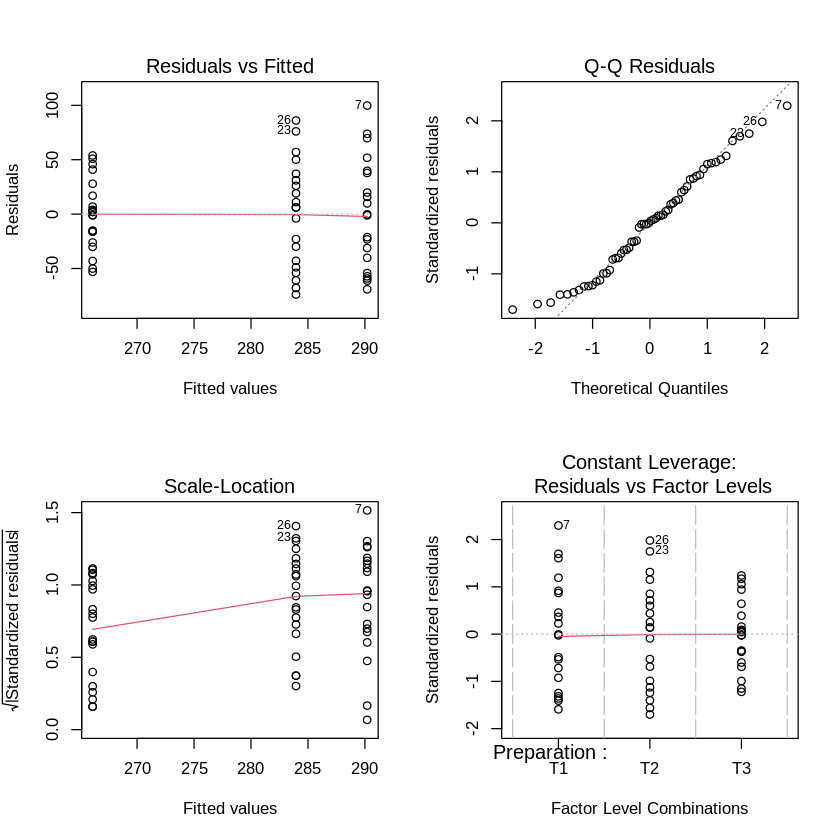

In [ ]:
par(mfrow  =c(2,2))
plot(mode1)

Graph1 : Residuals vs Fitted:
- dispertion symetrique , et le ligne rouge du moyenne est horizontale en 0 => valide

Graph2 :
- normalite des residus est valide

=>les hypotheses sont valid", on accept le p-value de notre mode1
mode1 n'est pas significatif


Tester l’effet du traitement et des doses ainsi que leur interaction (mode2)

In [ ]:
mode2 <- lm(Reponse ~ Preparation * Dose, data = data)

In [ ]:
anova(mode2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Preparation,2,6256.633,3128.3167,4.086246,2.225758e-02
Dose,1,63830.817,63830.8167,83.376610,1.542633e-12
Preparation:Dose,2,8218.233,4109.1167,5.367380,7.480283e-03
Residuals,54,41340.900,765.5722,NA,NA


-effet de preparaion a la reponse: pvalue 0.02< 0.05 =>

-effect de done a la reponse: tres significatif !

-effet de dose et preparation a la reponse: l'interraction est significatif =>la dose et la preparation on un effet sur la reponse

In [ ]:
summary(mode2)


Call:
lm(formula = Reponse ~ Preparation * Dose, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-42.20 -20.93  -3.50  19.40  58.00 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           332.00       8.75  37.944  < 2e-16 ***
PreparationT2          -8.10      12.37  -0.655 0.515503    
PreparationT3         -49.80      12.37  -4.025 0.000179 ***
Dose2                 -83.60      12.37  -6.756 1.03e-08 ***
PreparationT2:Dose2     3.70      17.50   0.211 0.833343    
PreparationT3:Dose2    51.40      17.50   2.937 0.004860 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.67 on 54 degrees of freedom
Multiple R-squared:  0.6545,	Adjusted R-squared:  0.6225 
F-statistic: 20.46 on 5 and 54 DF,  p-value: 2.127e-11


p-value << 0.05 : le model est tres significatif

H0: les deux facteurs  n'ont pas d'effet sur la reponse

H1: au moin 1 facteur a un effect sur la reponse

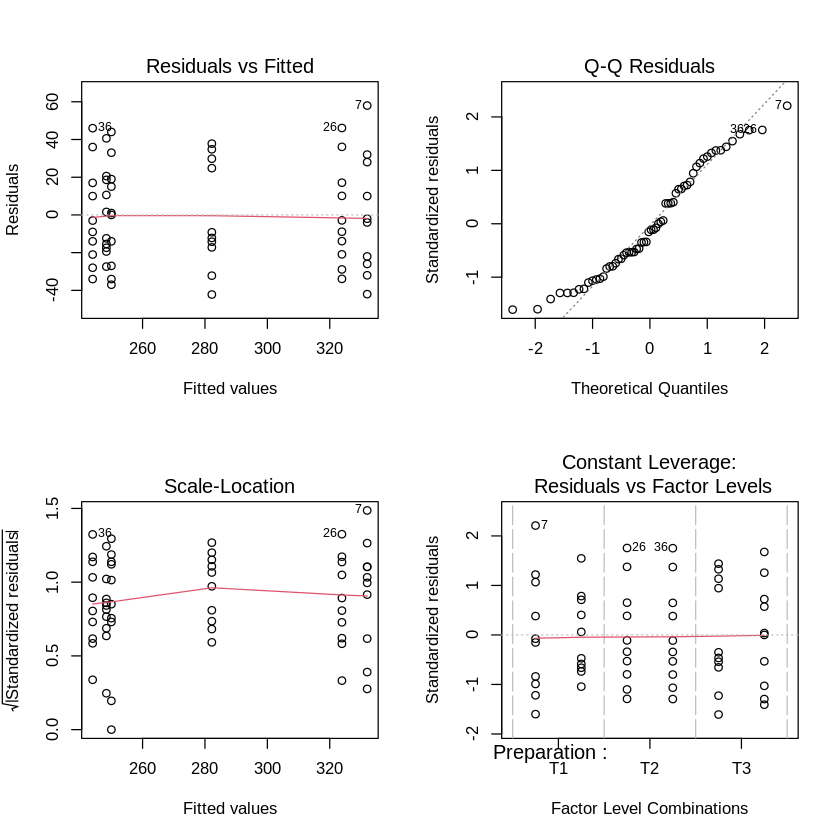

In [ ]:
par(mfrow  =c(2,2))
plot(mode2)

### Plot the interaction graphically


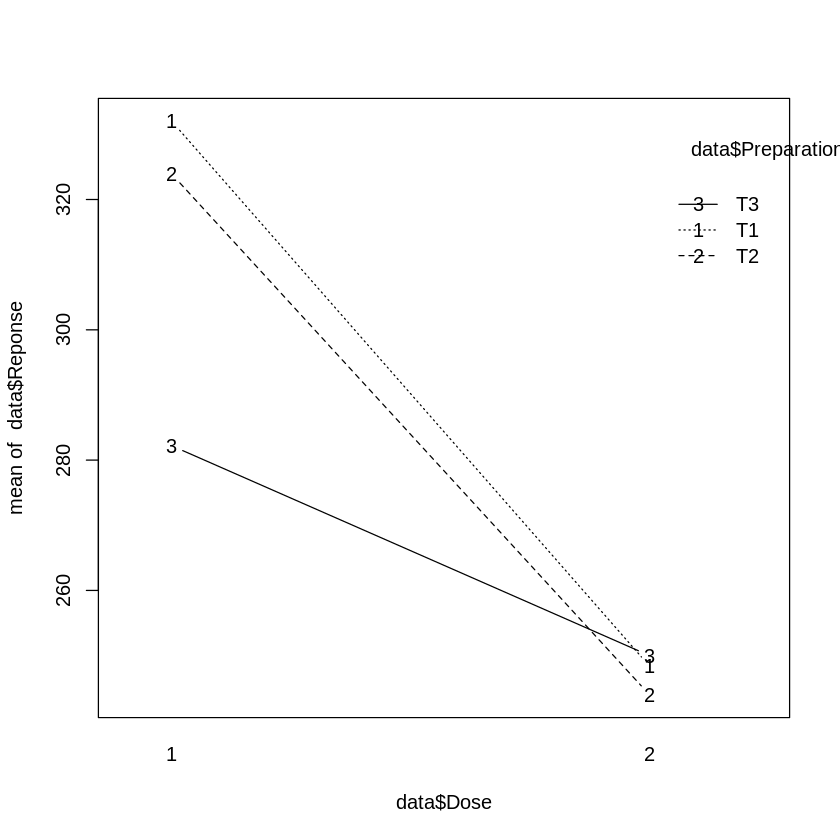

In [ ]:
interaction.plot(data$Dose, data$Preparation, data$Reponse, type = "b")

il ya une point d'intersection, il ya alors une interraction entre 3 et 1 , 1 et 2

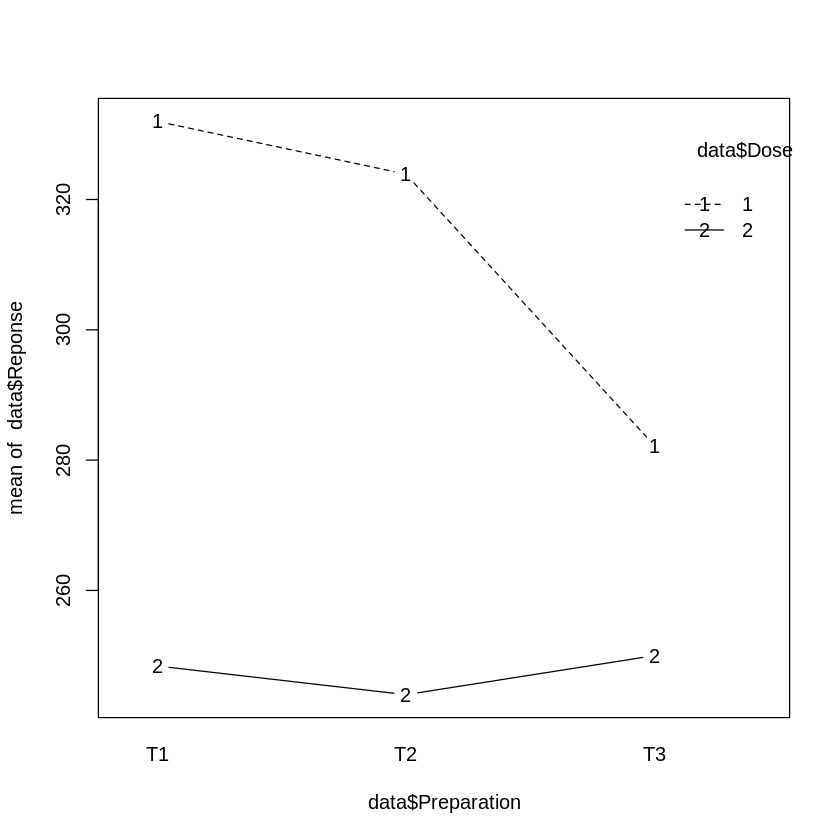

In [ ]:
interaction.plot( data$Preparation,data$Dose, data$Reponse, type = "b")

il faut etudier l'effect des deux facteurs

In [ ]:
data_dose1 <- subset(data, Dose == 1)
data_dose2 <- subset(data, Dose == 2)

In [ ]:
anova_dose1 <- aov(Reponse ~ Preparation, data = data_dose1)
anova_dose2 <- aov(Reponse ~ Preparation, data = data_dose2)

In [ ]:
anova(anova_dose1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Preparation,2,14281.8,7140.9000,8.219653,0.001629265
Residuals,27,23456.5,868.7593,NA,NA


In [ ]:
anova(anova_dose2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Preparation,2,193.0667,96.53333,0.1457359,0.8650613
Residuals,27,17884.4000,662.38519,NA,NA


In [ ]:
# Use pairwise.t.test to compare treatments within each dose group
pairwise_treat_dose1 <- pairwise.t.test(data_dose1$Reponse, data_dose1$Preparation, p.adjust.method = "bonferroni")
pairwise_treat_dose2 <- pairwise.t.test(data_dose2$Reponse, data_dose2$Preparation, p.adjust.method = "bonferroni")

In [ ]:
# Print results
print(pairwise_treat_dose1)
print(pairwise_treat_dose2)


	Pairwise comparisons using t tests with pooled SD 

data:  data_dose1$Reponse and data_dose1$Preparation 

   T1     T2    
T2 1.0000 -     
T3 0.0024 0.0115

P value adjustment method: bonferroni 

	Pairwise comparisons using t tests with pooled SD 

data:  data_dose2$Reponse and data_dose2$Preparation 

   T1 T2
T2 1  - 
T3 1  1 

P value adjustment method: bonferroni 


Dans la dose 1:
T1 et T2 => il nya pas de dirfference entre les reponses de T1 et  T2

T3 differt de T1 et T2

on regroupe T1 et T2

traitement T2 est plus efficace